In [ ]:
!pip install sdv

In [5]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StringType, StructType, IntegerType, DateType, StructField, FloatType
import pyspark.sql.functions as f

from sdv.single_table import GaussianCopulaSynthesizer
from sdv.metadata import Metadata

import pandas as pd

In [6]:
data_path = '/content/electronic_devices.csv'

In [7]:
data = pd.read_csv(data_path)
data

,customer_id,age,gender,loyalty_member,product_type,sku,rating,order_status,payment_method,total_price,unit_price,quantity,purchase_date,shipping_type,addons,addons_cnt
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,NaN,0.00
19996,19996,27,Female,Yes,Laptop,LTP123,4,Cancelled,Credit Card,2697.28,674.32,4,2024-07-18,Standard,NaN,0.00
19997,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98
19998,19997,27,Male,No,Headphones,HDP456,1,Cancelled,Bank Transfer,2528.26,361.18,7,2024-01-06,Expedited,"Extended Warranty, Accessory",101.34


In [8]:
data = pd.read_csv(data_path)
metadata = Metadata.detect_from_dataframe(
    data=data,
    table_name='electronic_devices'
)
synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(data=data)

/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


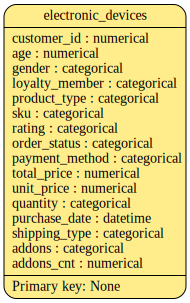

In [9]:
metadata.visualize()

In [10]:
synth_data = synthesizer.sample(num_rows=1000000)

In [11]:
type(synth_data)

pandas.core.frame.DataFrame

In [12]:
synth_data.shape

(1000000, 16)

In [13]:
synth_data.to_csv('synth_electronic_devices.csv')

In [15]:
quality_report = evaluate_quality(
    data,
    synth_data,
    metadata)

NameError: name 'evaluate_quality' is not defined

In [ ]:

spark = SparkSession \
            .builder \
            .appName("movies_app") \
            .master("local") \
            .getOrCreate()


In [ ]:
df = spark \
    .read \
    .option("header", "true") \
    .option("multiline", "true") \
    .option("sep", ",") \
    .option("quote", "*") \
    .option("dateFormat", "M/d/y") \
    .option("inferSchema", "true") \
    .csv(data_path)

In [ ]:
df.show(10,20)

In [ ]:
df.printSchema()